In [1]:
import pandas as pd
data = pd.read_csv("restaurant_dr_data.csv")
print(data.describe())
data = data.dropna()
# print(data.describe())

                                                 Scenario Related to
count                                                 249        249
unique                                                249          2
top     Show me list of poly clinics having OP in KPHB...   Hospital
freq                                                    1        135


In [2]:
data.head()
intent = data['Related to'].values
intent_i = pd.factorize(intent)
statements = data['Scenario'].values
# lengths = [len(r) for r in reviews]
classes = intent_i[0] # Converted intent to labels 0, 1, etc.

In [3]:
import re
only_alnum = re.compile(r"[^a-z0-9]+")
## Replaces one or more occurrence of any characters other than a-z and 0-9 with a space
## This automatically replaces multiple spaces by 1 space

## The try ... except ensures that if a review is mal-formed then the review is replaced with the word ERROR
def cleanUp(s):
    return re.sub(only_alnum, " ", s.lower())

In [1]:
fluff = set([w.strip() for w in open("fluff.txt")])

In [5]:
def get_useful_words(s):
    return [w for w in cleanUp(s).split() if len(w) > 2 and w not in fluff]

In [6]:
clean_statements = [get_useful_words(statement) for statement in statements]
for i in range(5):
    print("%4d" %(len(statements[i])), statements[i], "\n==>", clean_statements[i])

  30 Where can I get good veg food? 
==> ['good', 'veg', 'food']
  36 Tell me veg restaurants in KPHB area 
==> ['tell', 'veg', 'restaurants', 'kphb']
  42 what is the lunch buffet in DAS Restaurant 
==> ['lunch', 'buffet', 'das', 'restaurant']
  31 Is Oheris restaurant open today 
==> ['oheris', 'restaurant']
  39 Will they serve Brunch at Bikeneerwala? 
==> ['serve', 'brunch', 'bikeneerwala']


In [7]:
# from sklearn.feature_extraction.text import CountVectorizer
# count_vect = CountVectorizer()
# X_train_counts = count_vect.fit_transform(clean_statements)
# X_train_counts.shape

# import collections, re

'''Bag of Words'''

from collections import Counter
frequency = Counter()
for s in clean_statements:
#     print(s)
    frequency += Counter(s)

# frequency

In [8]:
import operator
sorted_words = sorted(frequency.items(), key=operator.itemgetter(1), reverse=True)
print("Top-10 most frequent words:")
for word in sorted_words[:10]:
    print(word)

print('----------------------------')
print("10 least frequent words:")
for word in sorted_words[-10:-1]:
    print(word)

Top-10 most frequent words:
('restaurant', 44)
('list', 43)
('kphb', 35)
('doctor', 32)
('food', 29)
('clinics', 24)
('hospital', 24)
('best', 18)
('hyderabad', 16)
('kaveri', 15)
----------------------------
10 least frequent words:
('persons', 1)
('whom', 1)
('lost', 1)
('medication', 1)
('echo', 1)
('shameer', 1)
('inpatient', 1)
('circle', 1)
('natal', 1)


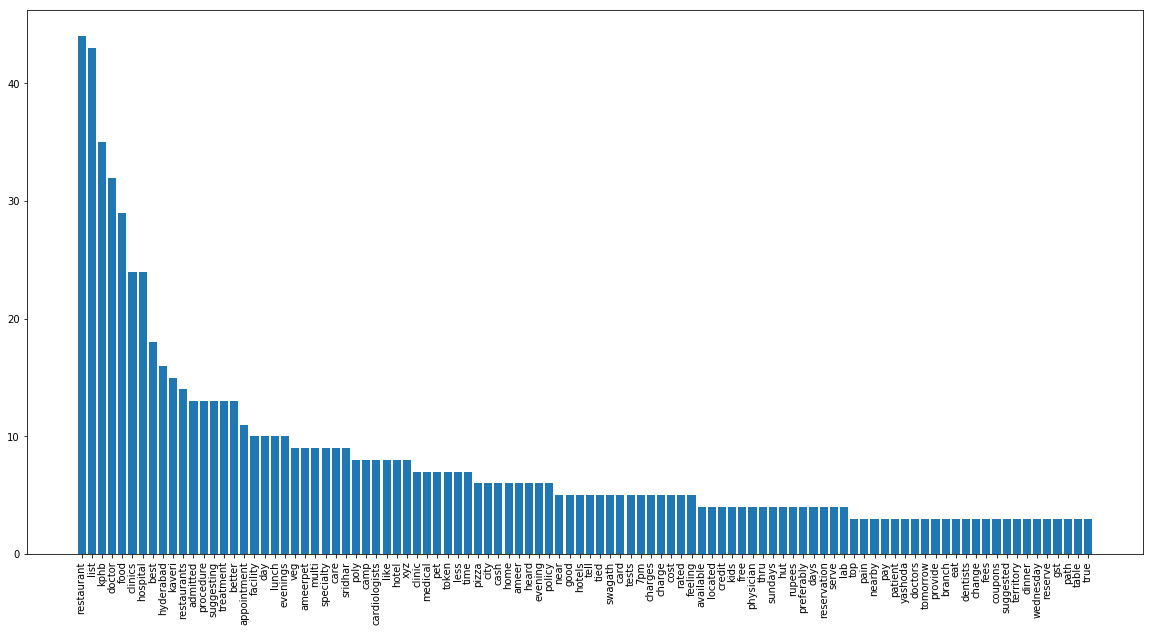

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig = plt.figure()
fig.set_size_inches(20,10)

plt.bar(range(len(sorted_words[:100])), [v for k, v in sorted_words[:100]] , align='center')
plt.xticks(range(len(sorted_words[:100])), [k for k, v in sorted_words[:100]])
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

In [10]:
from collections import defaultdict
valid_words = defaultdict(int)

print('Number of words before preprocessing:', len(sorted_words))

# Ignore the 25 most frequent words, and the words which appear less than 100 times
ignore_most_frequent = 0
freq_thresh = 1
feature_number = 0
for word, word_frequency in sorted_words[ignore_most_frequent:]:
    if word_frequency > freq_thresh:
        valid_words[word] = feature_number
        feature_number += 1
        
print('Number of words after preprocessing:', len(valid_words))

word_vector_size = len(valid_words)

Number of words before preprocessing: 501
Number of words after preprocessing: 501


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(clean_statements, classes, test_size=0.33)

In [48]:
X_train[-5:], X_test[-5:], y_train[-5:], y_test[-5:]
# X_train[np.where(y_train[:5]==1)]
# type(X_train)

([['list', 'hotels', 'kms', 'radius', 'orr', 'exit'],
  ['doctor',
   'suggesting',
   'admitted',
   'hospital',
   'better',
   'treatment',
   'regular',
   'medication'],
  ['gastroenterologist'],
  ['feeling', 'dehydrated'],
  ['list', 'poly', 'clinics', 'kphb']],
 [['lost', 'patient', 'card', 'reissue'],
  ['dosa', 'hut', 'sell', 'dosas'],
  ['ambulance', 'facility', 'shift', 'patients'],
  ['forgot',
   'cell',
   'phone',
   'swagath',
   'hotel',
   'ameerpet',
   'pls',
   'managers'],
  ['ameerpet', 'kaveri', 'restaurant', 'kids', 'play']],
 array([0, 1, 1, 1, 1]),
 array([1, 0, 1, 0, 0]))

In [50]:
import numpy as np
num_train_doc = len(X_train) # Num of classes
num_test_doc = len(X_test)

def convert_to_BoW(dataset, number_of_documents, label_list, valid_words):
    bow_representation = np.zeros((number_of_documents, word_vector_size))
    labels = np.zeros((number_of_documents, 1))
    
    i = 0
    for text in dataset:
        
            # Read all text in file
#             text = ' '.join([str(l) for l in f]).split(' ')
            
            # For each word
            for word in text:
                if word in valid_words:
                    bow_representation[i, valid_words[word]] += 1
            
            # Increment document counter
            i += 1
    
    return bow_representation, label_list

# Convert the dataset into their bag of words representation treating train and test separately
train_bow_set, train_bow_labels = convert_to_BoW(X_train, num_train_doc, y_train, valid_words)
test_bow_set, test_bow_labels = convert_to_BoW(X_test, num_test_doc, y_test, valid_words)

TypeError: convert_to_BoW() missing 1 required positional argument: 'valid_words'

In [14]:
train_bow_set, train_bow_labels

(array([[0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]),
 array([0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
        0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
        0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]))

In [15]:
# from sklearn.neural_network import MLPRegressor
# clf = MLPRegressor(
#     hidden_layer_sizes=(10,),  activation='relu', solver='adam', alpha=0.0001, batch_size=4,
#     learning_rate='adaptive',learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=False,
#     random_state=2, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
#     early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [16]:
# from sklearn.metrics import accuracy_score

# def train_and_predict(X_train, y_train, X_test, y_test):
#     y_train = y_train.reshape(-1, 1)
#     clf.fit(X_train, y_train)
#     print(clf.coefs_)

#     # Make predictions using the testing set
#     from sklearn.metrics import mean_squared_error
#     y_pred = clf.predict(X_test)
#     # The mean squared error
#     print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
#     print("Mean squared error: %.2f" % accuracy_score(y_test, np.round(y_pred))) # round() to get a decent idea of accuracy
    
#     return y_pred

In [17]:
from sklearn.svm import LinearSVC
## Creating the svm object
clf = LinearSVC(random_state=0)
## Fitting the data into the trained model
clf.fit(train_bow_set, train_bow_labels)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=0.0001,
     verbose=0)

In [18]:
# test_bow_set, test_bow_labels
y_pred = clf.predict(test_bow_set)

In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_bow_labels, y_pred))

0.9156626506024096


In [57]:
import operator
from functools import reduce

user_input = 'I am feeling hungry'

useful_words = reduce(operator.concat, [get_useful_words(statement) for statement in user_input.split(' ')])
bow_rep, _ = convert_to_BoW([useful_words], 1, None, valid_words)
assert clf.predict(bow_rep) == 0 # Restaurant

user_input = 'I have a big pain'

useful_words = reduce(operator.concat, [get_useful_words(statement) for statement in user_input.split(' ')])
bow_rep, _ = convert_to_BoW([useful_words], 1, None, valid_words)
assert clf.predict(bow_rep) == 1 # Hospital


In [58]:
from sklearn.externals import joblib
joblib.dump(clf, 'clf.pkl') 


# for j in bow_rep:
#     for i in j:
#         if i>0.1:
#             print(i)

# all(v != 0 for v in bow_rep)
# all(bow_rep == 0)
# for a in bow_rep:
#     print(a)
# any(v > 0.1 for v in bow_rep)

['clf.pkl']

In [59]:
np.save('valid_words.npy', valid_words) 

In [60]:
clf1 = joblib.load('clf.pkl') 


In [61]:
valid_words1 = read_dictionary = np.load('valid_words.npy').item()

In [63]:
valid_words1

defaultdict(int,
            {'100': 139,
             '10am': 194,
             '1pm': 420,
             '200': 316,
             '500': 483,
             '5pm': 444,
             '6pm': 168,
             '7pm': 55,
             '800': 216,
             '9am': 236,
             'abdominal': 315,
             'accept': 131,
             'accepted': 133,
             'accommodate': 220,
             'accompany': 261,
             'ache': 110,
             'actually': 241,
             'additional': 400,
             'admit': 468,
             'admitted': 11,
             'afternoon': 436,
             'age': 235,
             'aged': 181,
             'akshaya': 149,
             'allowed': 258,
             'alternate': 138,
             'ambience': 314,
             'ambulance': 428,
             'ameer': 43,
             'ameerpet': 22,
             'american': 427,
             'amount': 162,
             'anaemic': 435,
             'appointment': 16,
             'appointments': 3

In [64]:
import operator
from functools import reduce

clf = joblib.load('clf.pkl') 
valid_words = read_dictionary = np.load('valid_words.npy').item()

user_input = 'I am feeling hungry'

useful_words = reduce(operator.concat, [get_useful_words(statement) for statement in user_input.split(' ')])
bow_rep, _ = convert_to_BoW([useful_words], 1, None, valid_words)
assert clf.predict(bow_rep) == 0 # Restaurant

user_input = 'I have a big pain'

useful_words = reduce(operator.concat, [get_useful_words(statement) for statement in user_input.split(' ')])
bow_rep, _ = convert_to_BoW([useful_words], 1, None, valid_words)
assert clf.predict(bow_rep) == 1 # Hospital

In [66]:
get_useful_words()

TypeError: get_useful_words() missing 1 required positional argument: 's'